In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('first_cycle.csv', index_col=0)

/Users/kevin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
df.head(50)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


In [4]:
df.shape

(56623094, 2)

In [5]:
len(df.acoustic_data.value_counts())

3043

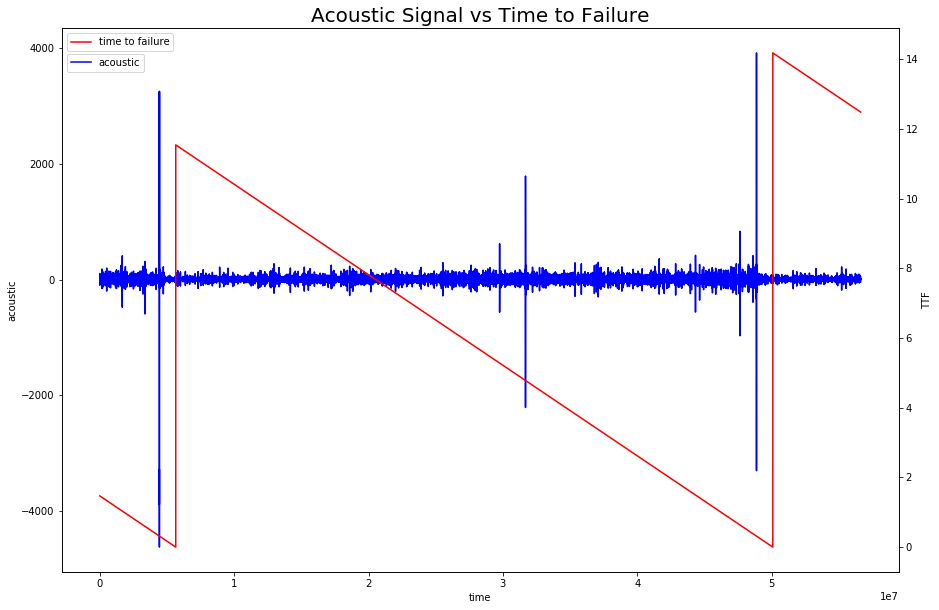

In [17]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('Acoustic Signal vs Time to Failure', size=20)

ax1.set_xlabel('time')
ax1.set_ylabel('acoustic')
ax1.plot(df.acoustic_data, color='b', label = 'acoustic')
plt.legend(loc=(.006,.92))

ax2 = ax1.twinx()
ax2.set_ylabel('TTF')
ax2.plot(df.time_to_failure, color='r', label = 'time to failure')
plt.legend(loc=2);


The cyclicality of the seismic signals is obvious. It seems like after a big up and down spike in signal, there is a slight lag where the signal becomes very low and the time to failure reaches near 0. For the modeling, we should pay careful attention to this lag since the big spikes in signal don't necessarily indicate an earthquake at that exact point in time. Additionally, especially if we're going to use classification, the random spikes like the one in the middle could yield false positives. Here, we probably want to minimize false negatives and therefore optimize precision/recall. 

There are a few things I want to try:
* Find all the local minima (basically anywhere TTF ~ 0 == earthquake
* Find all the differences in "time" (index) between the spike in seismic signal and the local minima

### 1. Local minima

The purpose of finding all the local minima is so that we can see the characteristics of the data when earthquakes actually happen. This can include looking at the rate of change in ttf/seismic signal before and after the earthquake, distances between the local minima, etc.

In [13]:
def local_minima(data):
    
    # Find the local minima ttf 
    l = [time for i, time in enumerate(data.time_to_failure) if data.time_to_failure[i+1] - time > 7]
    return l
    # find corresponding seismic signal
    
    
    # takes way too damn long

### 2. Differences in time between spike and local minima